In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from tensorflow import random

Using TensorFlow backend.


In [2]:
seed = 43
np.random.seed(seed)
random.set_seed(seed)

In [3]:
classifier = Sequential()

In [4]:
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))

In [5]:
classifier.add(MaxPool2D(2, 2))

In [6]:
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPool2D(2, 2))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))

In [9]:
classifier.add(Dense(1, activation='sigmoid'))

In [10]:
classifier.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [26]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [39]:
training_set = train_data_gen.flow_from_directory('datasets/batmanXsuperman/training_set', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_data_gen.flow_from_directory('datasets/batmanXsuperman/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 219 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [40]:
classifier.fit_generator(training_set, steps_per_epoch=504 / 32, epochs=5, validation_data=test_set, validation_steps=164 / 32, 
                         shuffle=False)

Epoch 1/5
16/15 [==============================] - 12s 725ms/step - loss: 0.6600 - accuracy: 0.6912 - val_loss: 0.8241 - val_accuracy: 0.2500
Epoch 2/5
16/15 [==============================] - 11s 714ms/step - loss: 0.6151 - accuracy: 0.6892 - val_loss: 0.9046 - val_accuracy: 0.2500
Epoch 3/5
16/15 [==============================] - 12s 781ms/step - loss: 0.5987 - accuracy: 0.6972 - val_loss: 0.8628 - val_accuracy: 0.2500
Epoch 4/5
16/15 [==============================] - 13s 830ms/step - loss: 0.5409 - accuracy: 0.7022 - val_loss: 1.2221 - val_accuracy: 0.3500
Epoch 5/5
16/15 [==============================] - 12s 780ms/step - loss: 0.5055 - accuracy: 0.7550 - val_loss: 1.0909 - val_accuracy: 0.6167


## Classificando nova imagem

#### Carro

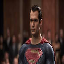

In [41]:
new_image = image.load_img('datasets/superman.jpg', target_size=(64, 64))
new_image

In [42]:
training_set.class_indices

{'Batman': 0, 'Superman': 1}

In [43]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)

In [44]:
result = classifier.predict(new_image)

In [45]:
if result[0][0] == 1:
    print('SUPERMAN')
else:
    print('BATMAN')

SUPERMAN


#### Flor

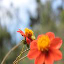

In [78]:
new_image = image.load_img('datasets/test_image_2.jpg', target_size=(64, 64))
new_image

In [79]:
training_set.class_indices

{'car': 0, 'flower': 1}

In [80]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis=0)

result = classifier.predict(new_image)

if result[0][0] == 1:
    print('É UMA FLOR')
else:
    print('É UM CARRO')

É UMA FLOR
